In [1]:
"""MASS Python App Challenge
	This is a draft

	Name:			MASS_CorePM_Challenge_FS.ipynb
	Author:			FS
	Version:		0.1
	Date:			Nov 21, 2021
	Modifications:	None / Initial Version
"""
import warnings
warnings.filterwarnings('ignore')

### MASS Python App Challenge 

In [2]:
""" Project Specification


Requirements

Input:
    1. A portfolio specified in percentage terms (i.e., IVV 50%, IXUS: 25%, AGG: 25%)

        Design note: take user input to create the initial portfolios. Can also make it more flexible to accept
        any user specified securities but for this exercise, will make it to be a portfolio of these 3 ETFs only, 
        because it is unknown such flexiblility is of value.   

    2. Rebalancing Frequency: Monthly, Quarterly, Semi-Annually, Annually)

    3. Time Window Determined by Start Date and End Date

Output: 
    1. A cumulative return history graph
    2. A file download link
    
Approach:

    1. Build functionality first 
    2. Ignoring stock split, dividend in return calculation. This is important especially for non-ETFs.
    I am assuming no stock split and no dividend from these ETFs. Will look to incorporate this feature
    if I have more time

"""



' Project Specification\n\n\nRequirements\n\nInput:\n    1. A portfolio specified in percentage terms (i.e., IVV 50%, IXUS: 25%, AGG: 25%)\n\n        Design note: take user input to create the initial portfolios. Can also make it more flexible to accept\n        any user specified securities but for this exercise, will make it to be a portfolio of these 3 ETFs only, \n        because it is unknown such flexiblility is of value.   \n\n    2. Rebalancing Frequency: Monthly, Quarterly, Semi-Annually, Annually)\n\n    3. Time Window Determined by Start Date and End Date\n\nOutput: \n    1. A cumulative return history graph\n    2. A file download link\n    \nApproach:\n\n    1. Build functionality first \n    2. Ignoring stock split, dividend in return calculation. This is important especially for non-ETFs.\n    I am assuming no stock split and no dividend from these ETFs. Will look to incorporate this feature\n    if I have more time\n\n'

### Load Default Packages

In [3]:
#Importing essential packages for data processing
%matplotlib inline
!pip install yfinance #installing yfinance
!pip install pandas_datareader
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import seaborn as sns
import re
import yfinance as yf
import pandas_datareader as datareader
#using yfinance library is great but not used here for compatilbility - I am including CSV files with this notebook.


"""
###I may not need these. Delete / Ignore if not needed

from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
"""

'\n###I may not need these. Delete / Ignore if not needed\n\nfrom sklearn.metrics import classification_report\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.neural_network import MLPRegressor\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.naive_bayes import BernoulliNB\nfrom sklearn.naive_bayes import MultinomialNB\n\nfrom sklearn.metrics import mean_absolute_error\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.svm import SVR\n'

### Input  - Simulation Setting

In [4]:
### I may want to build a nice user interface for this if I have time but for now, build core functionality first

#Define the Initial portfolio
starting_aum = 100000000 # starting money to be USD 100 million by default

rebalancing_frequency = 20 # in business days (assumption 20 business days a month)
#currently set to be 20 business days / monthly
#quarterly = 5* 4* 3 = 60
#semi-annual = 5* 4 * 6 = 120
#Annual = 252 business days 

#Enhancement Idea: This was a short-cut way. In a proper version, I would target 
#more specific dates such as month-end, etc. I like this way because it follows market
#trading days

rebalancing_threshold = 0.25 # in percent 
#I ended up not using this but I think it is a good idea to have a maximum deviation allowed before required to rebalance

start_date = '2016-11-21'# let's use 5 years ago for now. will build functionality to change start_date
end_date = '2021-11-19' # last business day as default for now
today = datetime.datetime.now()

column_t =['etf', 'target_allocation']
#Define investment universe
symbols = ['IVV', 'IXUS', 'AGG']
#Currently using default allocation
position_t = [
    ['IVV', 0.50],
    ['IXUS', 0.25],
    ['AGG', 0.25],
    ['Cash', 0]
] # this was not used. I used 'weight' below instead

weight = [0.50, 0.25, 0.25] # in order of IVV, IXUS, AGG
#starting portfolio 




### Data Reading 

In [5]:
### Data Reading
#Price data for IVV, IXUS, AGG. 


In [6]:
#ignore this part if yfinance, if you do not have yfinance library. 
#Maybe download and save this data as csv so people can run this code without this library
data = yf.download(symbols, start = start_date, end = end_date, group_by = "ticker")
data=data.dropna()
data.head()

price_data = datareader.get_data_yahoo(symbols, start = start_date, end = end_date)

#We are using yfinance package created DF below. or we can use CSV. Delete code as needed. 
#I am creating a new DF in case of BLK system does not allow to install this package 
IVV = data['IVV']
IXUS = data['IXUS']
AGG = data['AGG'] 

#These historical prices are CSV exports from Yahoo Finance, with 5 year data Nov 21, 2016 ~ Nov 21,2021
#This can be automated and made a lot more flexible using yfinance library 
# We do not need these files if the user can use Pandas datareader package 

IVV_csv= pd.read_csv('IVV.csv')
#Source:
#https://finance.yahoo.com/quote/IVV/history?period1=1479686400&period2=1637452800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

IXUS_csv = pd.read_csv('IXUS.csv')
#Source:
# https://finance.yahoo.com/quote/IXUS/history?period1=1479686400&period2=1637452800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

AGG_csv = pd.read_csv('AGG.csv')
#Source:
#https://finance.yahoo.com/quote/AGG/history?p=AGG





[*********************100%***********************]  3 of 3 completed


In [7]:
#Assumption: we will use 'Adj Close' as the reference price for each date. 
price_data=price_data['Adj Close']
print(price_data.head())

Symbols            IVV       IXUS        AGG
Date                                        
2016-11-21  201.208954  43.847645  96.068855
2016-11-22  201.545227  44.102879  96.157410
2016-11-23  201.763367  43.909252  95.820854
2016-11-25  202.499496  44.006069  95.811996
2016-11-28  201.608826  43.970856  96.148582


In [8]:
#convert date to column to datetime object. this is using 
# IVV['Date'] = pd.to_datetime(IVV['Date']) 
# IXUS['Date'] = pd.to_datetime(IXUS['Date'])
# AGG['Date'] = pd.to_datetime(AGG['Date'])

IVV_csv['Date'] = pd.to_datetime(IVV_csv['Date']) 
IXUS_csv['Date'] = pd.to_datetime(IXUS_csv['Date'])
AGG_csv['Date'] = pd.to_datetime(AGG_csv['Date'])

In [9]:
IVV.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-21,220.419998,221.440002,220.259995,221.389999,201.208984,3181600
2016-11-22,221.800003,222.050003,220.990005,221.759995,201.545212,3062300
2016-11-23,221.250000,222.029999,221.009995,222.000000,201.763351,3758500
2016-11-25,222.360001,222.820007,222.289993,222.809998,202.499512,1850800
2016-11-28,222.429993,222.750000,221.630005,221.830002,201.608841,4820900


In [10]:
print("Initial Portfolio Weight is: " , sum(weight), "\n", "*It has to add up to: 1")

Initial Portfolio Weight is:  1.0 
 *It has to add up to: 1


In [11]:
return_data = price_data.pct_change()[1:]
return_data.head()



Symbols,IVV,IXUS,AGG
Date,,,
2016-11-22,0.001671,0.005821,0.000922
2016-11-23,0.001082,-0.004390,-0.003500
2016-11-25,0.003648,0.002205,-0.000092
2016-11-28,-0.004398,-0.000800,0.003513
2016-11-29,0.001623,0.003603,0.001106


In [12]:
len(return_data)

1258

In [13]:
"""
We will calculate initial # of quantities for each asset,
#and this will remain until rebalanced
#Let's make a mechanism that keeps populate # of portfolio positions for a given timeframe 

Assumption:
1. We can and will buy fractional shares (to keep calculation simple)

"""

day = 0
initial_position = []
portfolio_value = starting_aum

# for i in range(len(weight)):
#Initial Value Setup. This is for easy understanding. I will use a for loop / recursion 
#to run this for the investment time frame

if day//rebalancing_frequency ==0:
  #if it is a rebalancing day, we rebalance and QTY will be reset, if not, existing QTY remains

    print(weight[0]*portfolio_value)
    IVV_QTY =weight[0] *portfolio_value / price_data['IVV'][0]
    IVV_Value = IVV_QTY * price_data['IVV'][0]
    print("IVV QTY: ", IVV_QTY)
    print("IVV Value: ", IVV_Value)
    IXUS_QTY = weight[1] *portfolio_value / price_data['IXUS'][0]
    IXUS_Value = IXUS_QTY * price_data['IXUS'][0]
    print("IXUS QTY: ", IXUS_QTY)
    print("IXUS Value: ", IXUS_Value)
    AGG_QTY = weight[2]*portfolio_value / price_data['AGG'][0]
    AGG_Value = AGG_QTY * price_data['AGG'][0]

    print("AGG QTY: ", AGG_QTY)
    print("AGG Value: ", AGG_Value)

    portfolio_value = IVV_Value + IXUS_Value + AGG_Value 
    print("Portfolio Value: ", portfolio_value)




50000000.0
IVV QTY:  248497.8876011172
IVV Value:  50000000.0
IXUS QTY:  570156.0508132789
IXUS Value:  25000000.0
AGG QTY:  260230.0186222342
AGG Value:  25000000.0
Portfolio Value:  100000000.0


In [14]:
portfolio_df = price_data.copy()

In [15]:
portfolio_df.head()

Symbols,IVV,IXUS,AGG
Date,,,
2016-11-21,201.208954,43.847645,96.068855
2016-11-22,201.545227,44.102879,96.157410
2016-11-23,201.763367,43.909252,95.820854
2016-11-25,202.499496,44.006069,95.811996
2016-11-28,201.608826,43.970856,96.148582


In [16]:
### My apologies - This code below is messy and not elegantly written. I hope to re-write
### the loop logic if this code was meant to be re-used in the future and help readibility 

### The logic is, if it is a rebalance day, set by rebalancing frequency, 
### it will recalculate the QTY / holdings based on the target asset allocation both, 
###  set in the beginning. If it is not a rebalance day, QTY / holdings stay the same 


#need containers, using them to update the dataframe
IVV_Q= []
IVV_V = []
AGG_Q =[]
AGG_V = []
IXUS_Q = []
IXUS_V = []
Port_Val =[]
day = 0
portfolio_value = starting_aum
IVV_Value = 0
IXUS

for i in range(len(return_data)):
#     print("Day: ", day)
#     print("IVV QTY SOD: ", IVV_QTY)
#     print("IXUS QTY SOD: ", IXUS_QTY)
#     print("AGG QTY SOD: ", AGG_QTY)
    
    
    if i % rebalancing_frequency == 0:
        #if it is a rebalancing day, we will update quantity
        
#         print("i: ", i)
#         print("rebalancing_frequency=", rebalancing_frequency)
    
#         print("i // rebalancing_frequcy =", i % rebalancing_frequency)
#         print("Rebalaning Day. \n Starting Portfolio Value: ", portfolio_value)
        IVV_QTY =weight[0] *portfolio_value / price_data['IVV'][i]
        IVV_Value = IVV_QTY * price_data['IVV'][i]
        
        
#         print("IVV QTY: ", IVV_QTY)
#         print("IVV Value: ", IVV_Value)
        IXUS_QTY = weight[1] *portfolio_value / price_data['IXUS'][i]
        IXUS_Value = IXUS_QTY * price_data['IXUS'][i]
       
        
#         print("IXUS QTY: ", IXUS_QTY)
#         print("IXUS Value: ", IXUS_Value)
        #update qty
        AGG_QTY = weight[2]*portfolio_value / price_data['AGG'][i]
        AGG_Value = AGG_QTY * price_data['AGG'][i]
      
        
#         print("AGG QTY: ", AGG_QTY)
#         print("AGG Value: ", AGG_Value)

        portfolio_value = IVV_Value + IXUS_Value + AGG_Value 
#         print("Portfolio Value: ", portfolio_value)
        
        
        portfolio_value = IVV_Value + IXUS_Value + AGG_Value
#         print("ending portfolio_value :", portfolio_value)
    
        
    else: 
        #when it is not a rebalancing day, QTY changes the same, just value gets updated
#         print("Not a rebalancing day\n", "Starting Portfolio Value: ", portfolio_value)
        #IVV_QTY =IVV_QTY
        IVV_Value = IVV_QTY * price_data['IVV'][i]
      
#         print("IVV QTY: ", IVV_QTY)
#         print("IVV Value: ", IVV_Value)
        #IXUS_QTY = IXUS_QTY
        IXUS_Value = IXUS_QTY * price_data['IXUS'][i]
   
#         print("IXUS QTY: ", IXUS_QTY)
#         print("IXUS Value: ", IXUS_Value)
        
        #AGG_QTY = AGG_QTY
        AGG_Value = AGG_QTY * price_data['AGG'][i]
        
#         print("AGG QTY: ", AGG_QTY)
#         print("AGG Value: ", AGG_Value)

        portfolio_value = IVV_Value + IXUS_Value + AGG_Value 
#         print("Portfolio Value: ", portfolio_value)
        
        #Summarize before the next loop
#         print("ending portfolio_value :", portfolio_value)
    
    day = day+1
    
    IVV_Q.append(IVV_QTY)
    IVV_V.append(IVV_Value)
    AGG_Q.append(AGG_QTY)
    AGG_V.append(AGG_Value)        
    IXUS_Q.append(IXUS_QTY)
    IXUS_V.append(IXUS_Value)
    Port_Val.append(portfolio_value)
    
#     print("Day: ", day)
   


In [17]:
### Quality Control. Sense Check
print("IVV_Value:", len(IVV_V))
print("IVV_QTY: ", len(IVV_Q))
print("AGG_Value: ", len( AGG_V))
print("AGG_QTY: ",len(AGG_Q))

print("IXUS_QTY", len(IXUS_Q))
print("IXUS_Value", len(IXUS_V))
print("Portfolio_Value",  len(Port_Val))

print("Portfolio : ", len(portfolio_df))


IVV_Value: 1258
IVV_QTY:  1258
AGG_Value:  1258
AGG_QTY:  1258
IXUS_QTY 1258
IXUS_Value 1258
Portfolio_Value 1258
Portfolio :  1259


In [18]:
  
    
#after all for loop is done. we want to add all the prices, QTY, Values we 
#calculated here to the overall dataframe
portfolio_df2 = portfolio_df[:-1] # We need to drop the last row. 

portfolio_df2['IVV_Value'] = IVV_V
portfolio_df2['IVV_QTY'] = IVV_Q
portfolio_df2['AGG_Value'] = AGG_V
portfolio_df2['AGG_QTY'] = AGG_Q

portfolio_df2['IXUS_QTY'] = IXUS_Q
portfolio_df2['IXUS_Value'] = IXUS_V
portfolio_df2['Portfolio_Value'] = Port_Val




In [19]:
portfolio_df2.head()
portfolio_df2['Cumulative Return'] = portfolio_df2['Portfolio_Value'] / starting_aum -1



In [20]:
portfolio_monthly = portfolio_df2
portfolio_monthly.head()

Symbols,IVV,IXUS,AGG,IVV_Value,IVV_QTY,AGG_Value,AGG_QTY,IXUS_QTY,IXUS_Value,Portfolio_Value,Cumulative Return
Date,,,,,,,,,,,
2016-11-21,201.208954,43.847645,96.068855,5.000000e+07,248497.887601,2.500000e+07,260230.018622,570156.050813,2.500000e+07,1.000000e+08,0.000000
2016-11-22,201.545227,44.102879,96.157410,5.008356e+07,248497.887601,2.502304e+07,260230.018622,570156.050813,2.514552e+07,1.002521e+08,0.002521
2016-11-23,201.763367,43.909252,95.820854,5.013777e+07,248497.887601,2.493546e+07,260230.018622,570156.050813,2.503513e+07,1.001084e+08,0.001084
2016-11-25,202.499496,44.006069,95.811996,5.032070e+07,248497.887601,2.493316e+07,260230.018622,570156.050813,2.509033e+07,1.003442e+08,0.003442
2016-11-28,201.608826,43.970856,96.148582,5.009937e+07,248497.887601,2.502075e+07,260230.018622,570156.050813,2.507025e+07,1.001904e+08,0.001904


### Run analysis for different rebalancing frequency


Now we have a cumulative return for a scenario where we do a monthly (30-day) rebalancing. We can re-run this calculation (ideally, I would write a separate function to do this calculation multiple times but in interest of time, I will re-use the code above 



In [21]:

### Quarterly Rebalance 
### Again messy loop code from earlier reused for Quarterly, Semi-Annual, Annual. 
### See earlier note on this

rebalancing_frequency = 60 # in business days (assumption 20 business days a month)
#currently set to be 20 business days / monthly
#quarterly = 5* 4* 3 = 60
#semi-annual = 5* 4 * 6 = 120
#Annual = 252 business days 

#need containers, using them to update the dataframe
IVV_Q= []
IVV_V = []
AGG_Q =[]
AGG_V = []
IXUS_Q = []
IXUS_V = []
Port_Val =[]
day = 0
portfolio_value = starting_aum
IVV_Value = 0


for i in range(len(return_data)):
#     print("Day: ", day)
#     print("IVV QTY SOD: ", IVV_QTY)
#     print("IXUS QTY SOD: ", IXUS_QTY)
#     print("AGG QTY SOD: ", AGG_QTY)
    
    
    if i % rebalancing_frequency == 0:
        #if it is a rebalancing day, we will update quantity
        
#         print("i: ", i)
#         print("rebalancing_frequency=", rebalancing_frequency)
    
#         print("i // rebalancing_frequcy =", i % rebalancing_frequency)
#         print("Rebalaning Day. \n Starting Portfolio Value: ", portfolio_value)
        IVV_QTY =weight[0] *portfolio_value / price_data['IVV'][i]
        IVV_Value = IVV_QTY * price_data['IVV'][i]
        
        
#         print("IVV QTY: ", IVV_QTY)
#         print("IVV Value: ", IVV_Value)
        IXUS_QTY = weight[1] *portfolio_value / price_data['IXUS'][i]
        IXUS_Value = IXUS_QTY * price_data['IXUS'][i]
       
        
#         print("IXUS QTY: ", IXUS_QTY)
#         print("IXUS Value: ", IXUS_Value)
        #update qty
        AGG_QTY = weight[2]*portfolio_value / price_data['AGG'][i]
        AGG_Value = AGG_QTY * price_data['AGG'][i]
      
        
#         print("AGG QTY: ", AGG_QTY)
#         print("AGG Value: ", AGG_Value)

        portfolio_value = IVV_Value + IXUS_Value + AGG_Value 
        #print("Portfolio Value: ", portfolio_value)
        
        
        portfolio_value = IVV_Value + IXUS_Value + AGG_Value
        #print("ending portfolio_value :", portfolio_value)
    
        
    else: 
        #when it is not a rebalancing day, QTY changes the same, just value gets updated
        #print("Not a rebalancing day\n", "Starting Portfolio Value: ", portfolio_value)
        #IVV_QTY =IVV_QTY
        IVV_Value = IVV_QTY * price_data['IVV'][i]
      
        #print("IVV QTY: ", IVV_QTY)
        #print("IVV Value: ", IVV_Value)
        #IXUS_QTY = IXUS_QTY
        IXUS_Value = IXUS_QTY * price_data['IXUS'][i]
   
        #print("IXUS QTY: ", IXUS_QTY)
        #print("IXUS Value: ", IXUS_Value)
        
        #AGG_QTY = AGG_QTY
        AGG_Value = AGG_QTY * price_data['AGG'][i]
        
        #print("AGG QTY: ", AGG_QTY)
        #print("AGG Value: ", AGG_Value)

        portfolio_value = IVV_Value + IXUS_Value + AGG_Value 
        #print("Portfolio Value: ", portfolio_value)
        
        #Summarize before the next loop
        #print("ending portfolio_value :", portfolio_value)
    
    day = day+1
    
    IVV_Q.append(IVV_QTY)
    IVV_V.append(IVV_Value)
    AGG_Q.append(AGG_QTY)
    AGG_V.append(AGG_Value)        
    IXUS_Q.append(IXUS_QTY)
    IXUS_V.append(IXUS_Value)
    Port_Val.append(portfolio_value)
    
    #print("Day: ", day)
   



In [22]:
    
#after all for loop is done. we want to add all the prices, QTY, Values we 
#calculated here to the overall dataframe

portfolio_df3 = portfolio_df[:-1] # We need to drop the last row. 

portfolio_df3['IVV_Value'] = IVV_V
portfolio_df3['IVV_QTY'] = IVV_Q
portfolio_df3['AGG_Value'] = AGG_V
portfolio_df3['AGG_QTY'] = AGG_Q

portfolio_df3['IXUS_QTY'] = IXUS_Q
portfolio_df3['IXUS_Value'] = IXUS_V
portfolio_df3['Portfolio_Value'] = Port_Val

portfolio_df3['Cumulative Return'] = portfolio_df3['Portfolio_Value'] / starting_aum -1
portfolio_quarterly = portfolio_df3


In [23]:

### Semi-Annual Rebalance 
### Again messy loop code from earlier reused for Quarterly, Semi-Annual, Annual. 
### See earlier note on this

rebalancing_frequency = 120 # in business days (assumption 20 business days a month)
#semi-annual = 5* 4 * 6 = 120


#need containers, using them to update the dataframe
IVV_Q= []
IVV_V = []
AGG_Q =[]
AGG_V = []
IXUS_Q = []
IXUS_V = []
Port_Val =[]
day = 0
portfolio_value = starting_aum
IVV_Value = 0
IXUS

for i in range(len(return_data)):
#     print("Day: ", day)
#     print("IVV QTY SOD: ", IVV_QTY)
#     print("IXUS QTY SOD: ", IXUS_QTY)
#     print("AGG QTY SOD: ", AGG_QTY)
    
    
    if i % rebalancing_frequency == 0:
        #if it is a rebalancing day, we will update quantity
        
#         print("i: ", i)
#         print("rebalancing_frequency=", rebalancing_frequency)
    
#         print("i // rebalancing_frequcy =", i % rebalancing_frequency)
#         print("Rebalaning Day. \n Starting Portfolio Value: ", portfolio_value)
        IVV_QTY =weight[0] *portfolio_value / price_data['IVV'][i]
        IVV_Value = IVV_QTY * price_data['IVV'][i]
        
        
#         print("IVV QTY: ", IVV_QTY)
#         print("IVV Value: ", IVV_Value)
        IXUS_QTY = weight[1] *portfolio_value / price_data['IXUS'][i]
        IXUS_Value = IXUS_QTY * price_data['IXUS'][i]
       
        
#         print("IXUS QTY: ", IXUS_QTY)
#         print("IXUS Value: ", IXUS_Value)
        #update qty
        AGG_QTY = weight[2]*portfolio_value / price_data['AGG'][i]
        AGG_Value = AGG_QTY * price_data['AGG'][i]
      
        
#         print("AGG QTY: ", AGG_QTY)
#         print("AGG Value: ", AGG_Value)

        portfolio_value = IVV_Value + IXUS_Value + AGG_Value 
#         print("Portfolio Value: ", portfolio_value)
        
        
        portfolio_value = IVV_Value + IXUS_Value + AGG_Value
#         print("ending portfolio_value :", portfolio_value)
    
        
    else: 
        #when it is not a rebalancing day, QTY changes the same, just value gets updated
#         print("Not a rebalancing day\n", "Starting Portfolio Value: ", portfolio_value)
        #IVV_QTY =IVV_QTY
        IVV_Value = IVV_QTY * price_data['IVV'][i]
        #print("IVV QTY: ", IVV_QTY)
#         print("IVV Value: ", IVV_Value)
        #IXUS_QTY = IXUS_QTY
        IXUS_Value = IXUS_QTY * price_data['IXUS'][i]
   
#         print("IXUS QTY: ", IXUS_QTY)
#         print("IXUS Value: ", IXUS_Value)
        
        #AGG_QTY = AGG_QTY
        AGG_Value = AGG_QTY * price_data['AGG'][i]
        
#         print("AGG QTY: ", AGG_QTY)
#         print("AGG Value: ", AGG_Value)

        portfolio_value = IVV_Value + IXUS_Value + AGG_Value 
#         print("Portfolio Value: ", portfolio_value)
        
        #Summarize before the next loop
#         print("ending portfolio_value :", portfolio_value)
    
    day = day+1
    
    IVV_Q.append(IVV_QTY)
    IVV_V.append(IVV_Value)
    AGG_Q.append(AGG_QTY)
    AGG_V.append(AGG_Value)        
    IXUS_Q.append(IXUS_QTY)
    IXUS_V.append(IXUS_Value)
    Port_Val.append(portfolio_value)
    
#     print("Day: ", day)
   

    
#after all for loop is done. we want to add all the prices, QTY, Values we 
#calculated here to the overall dataframe

portfolio_df4 = portfolio_df[:-1] # We need to drop the last row. 

portfolio_df4['IVV_Value'] = IVV_V
portfolio_df4['IVV_QTY'] = IVV_Q
portfolio_df4['AGG_Value'] = AGG_V
portfolio_df4['AGG_QTY'] = AGG_Q

portfolio_df4['IXUS_QTY'] = IXUS_Q
portfolio_df4['IXUS_Value'] = IXUS_V
portfolio_df4['Portfolio_Value'] = Port_Val

portfolio_df4
portfolio_df4['Cumulative Return'] = portfolio_df4['Portfolio_Value'] / starting_aum -1



portfolio_semi = portfolio_df4





In [24]:

###Annual Rebalance 
### Again messy loop code from earlier reused for Quarterly, Semi-Annual, Annual. 
### See earlier note on this

rebalancing_frequency = 252 # in business days (assumption 20 business days a month)
#Annual = 252 business days 

#need containers, using them to update the dataframe
IVV_Q= []
IVV_V = []
AGG_Q =[]
AGG_V = []
IXUS_Q = []
IXUS_V = []
Port_Val =[]
day = 0
portfolio_value = starting_aum
IVV_Value = 0
IXUS

for i in range(len(return_data)):
#     print("Day: ", day)
#     print("IVV QTY SOD: ", IVV_QTY)
#     print("IXUS QTY SOD: ", IXUS_QTY)
#     print("AGG QTY SOD: ", AGG_QTY)
    
    
    if i % rebalancing_frequency == 0:
        #if it is a rebalancing day, we will update quantity
        
        #print("i: ", i)
        #print("rebalancing_frequency=", rebalancing_frequency)
    
        #print("i // rebalancing_frequcy =", i % rebalancing_frequency)
        #print("Rebalaning Day. \n Starting Portfolio Value: ", portfolio_value)
        IVV_QTY =weight[0] *portfolio_value / price_data['IVV'][i]
        IVV_Value = IVV_QTY * price_data['IVV'][i]
        
        
        #print("IVV QTY: ", IVV_QTY)
        #print("IVV Value: ", IVV_Value)
        IXUS_QTY = weight[1] *portfolio_value / price_data['IXUS'][i]
        IXUS_Value = IXUS_QTY * price_data['IXUS'][i]
       
        
        print("IXUS QTY: ", IXUS_QTY)
        print("IXUS Value: ", IXUS_Value)
        #update qty
        AGG_QTY = weight[2]*portfolio_value / price_data['AGG'][i]
        AGG_Value = AGG_QTY * price_data['AGG'][i]
      
        
        #print("AGG QTY: ", AGG_QTY)
        #print("AGG Value: ", AGG_Value)

        portfolio_value = IVV_Value + IXUS_Value + AGG_Value 
        #print("Portfolio Value: ", portfolio_value)
        
        
        portfolio_value = IVV_Value + IXUS_Value + AGG_Value
        #print("ending portfolio_value :", portfolio_value)
    
        
    else: 
        #when it is not a rebalancing day, QTY changes the same, just value gets updated
        #print("Not a rebalancing day\n", "Starting Portfolio Value: ", portfolio_value)
        #IVV_QTY =IVV_QTY
        IVV_Value = IVV_QTY * price_data['IVV'][i]
      
        #print("IVV QTY: ", IVV_QTY)
        #print("IVV Value: ", IVV_Value)
        #IXUS_QTY = IXUS_QTY
        IXUS_Value = IXUS_QTY * price_data['IXUS'][i]
   
        #print("IXUS QTY: ", IXUS_QTY)
#         print("IXUS Value: ", IXUS_Value)
        
        #AGG_QTY = AGG_QTY
        AGG_Value = AGG_QTY * price_data['AGG'][i]
        
#         print("AGG QTY: ", AGG_QTY)
#         print("AGG Value: ", AGG_Value)

        portfolio_value = IVV_Value + IXUS_Value + AGG_Value 
        #print("Portfolio Value: ", portfolio_value)
        
        #Summarize before the next loop
        #print("ending portfolio_value :", portfolio_value)
    
    day = day+1
    
    IVV_Q.append(IVV_QTY)
    IVV_V.append(IVV_Value)
    AGG_Q.append(AGG_QTY)
    AGG_V.append(AGG_Value)        
    IXUS_Q.append(IXUS_QTY)
    IXUS_V.append(IXUS_Value)
    Port_Val.append(portfolio_value)
    
#     print("Day: ", day)
   

    
#after all for loop is done. we want to add all the prices, QTY, Values we 
#calculated here to the overall dataframe

portfolio_df5 = portfolio_df[:-1] # We need to drop the last row. 

portfolio_df5['IVV_Value'] = IVV_V
portfolio_df5['IVV_QTY'] = IVV_Q
portfolio_df5['AGG_Value'] = AGG_V
portfolio_df5['AGG_QTY'] = AGG_Q

portfolio_df5['IXUS_QTY'] = IXUS_Q
portfolio_df5['IXUS_Value'] = IXUS_V
portfolio_df5['Portfolio_Value'] = Port_Val

portfolio_df5
portfolio_df5['Cumulative Return'] = portfolio_df5['Portfolio_Value'] / starting_aum -1



portfolio_annual = portfolio_df5




IXUS QTY:  570156.0508132789
IXUS Value:  25000000.0
IXUS QTY:  520819.52492544096
IXUS Value:  29407385.145606063
IXUS QTY:  566747.5977561633
IXUS Value:  29027368.452599593
IXUS QTY:  583651.312989913
IXUS Value:  33498144.159759507
IXUS QTY:  598454.5602861673
IXUS Value:  37667701.72774633


### Visualize!

In [25]:
#will use matplotlib, doing simple charts. will work on fancier charts if I have time

In [26]:
portfolio_annual.head()

Symbols,IVV,IXUS,AGG,IVV_Value,IVV_QTY,AGG_Value,AGG_QTY,IXUS_QTY,IXUS_Value,Portfolio_Value,Cumulative Return
Date,,,,,,,,,,,
2016-11-21,201.208954,43.847645,96.068855,5.000000e+07,248497.887601,2.500000e+07,260230.018622,570156.050813,2.500000e+07,1.000000e+08,0.000000
2016-11-22,201.545227,44.102879,96.157410,5.008356e+07,248497.887601,2.502304e+07,260230.018622,570156.050813,2.514552e+07,1.002521e+08,0.002521
2016-11-23,201.763367,43.909252,95.820854,5.013777e+07,248497.887601,2.493546e+07,260230.018622,570156.050813,2.503513e+07,1.001084e+08,0.001084
2016-11-25,202.499496,44.006069,95.811996,5.032070e+07,248497.887601,2.493316e+07,260230.018622,570156.050813,2.509033e+07,1.003442e+08,0.003442
2016-11-28,201.608826,43.970856,96.148582,5.009937e+07,248497.887601,2.502075e+07,260230.018622,570156.050813,2.507025e+07,1.001904e+08,0.001904


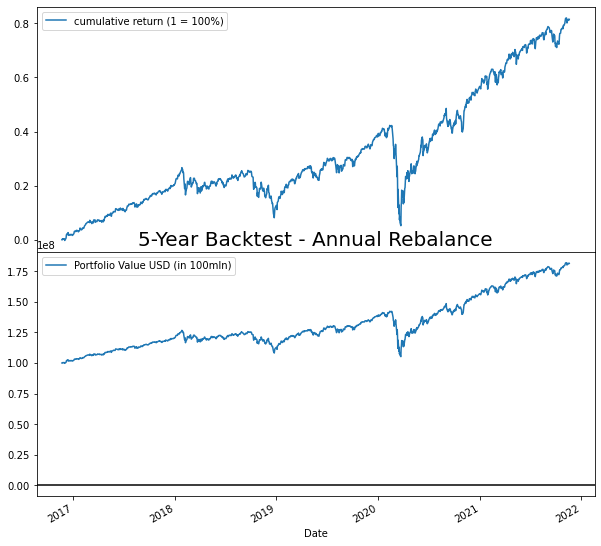

In [27]:
fig, axes = plt.subplots(2,1, figsize = (10,10))

portfolio_annual.plot(y = 'Cumulative Return', ax =axes[0], label = "cumulative return (1 = 100%)")
portfolio_annual.plot(y='Portfolio_Value', ax= axes[1], label = "Portfolio Value USD (in 100mln)")
plt.axhline(y=0.0, color='black', linestyle='-')
plt.legend(loc='best')

#The two plots' horizontal axes should align.
plt.subplots_adjust(hspace=.0)
plt.title("5-Year Backtest - Annual Rebalance", fontsize =20)
plt.show()

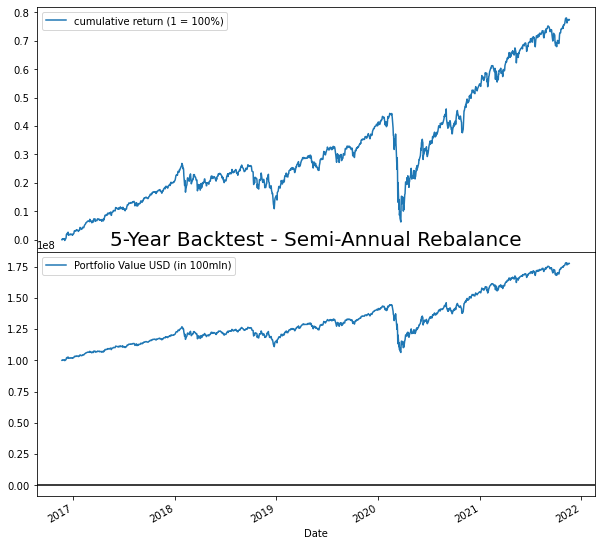

In [28]:
fig, axes = plt.subplots(2,1, figsize = (10,10))

portfolio_semi.plot(y = 'Cumulative Return', ax =axes[0], label = "cumulative return (1 = 100%)")
portfolio_semi.plot(y='Portfolio_Value', ax= axes[1], label = "Portfolio Value USD (in 100mln)")
plt.axhline(y=0.0, color='black', linestyle='-')
plt.legend(loc='best')

#The two plots' horizontal axes should align.
plt.subplots_adjust(hspace=.0)
plt.title("5-Year Backtest - Semi-Annual Rebalance", fontsize =20)
plt.show()

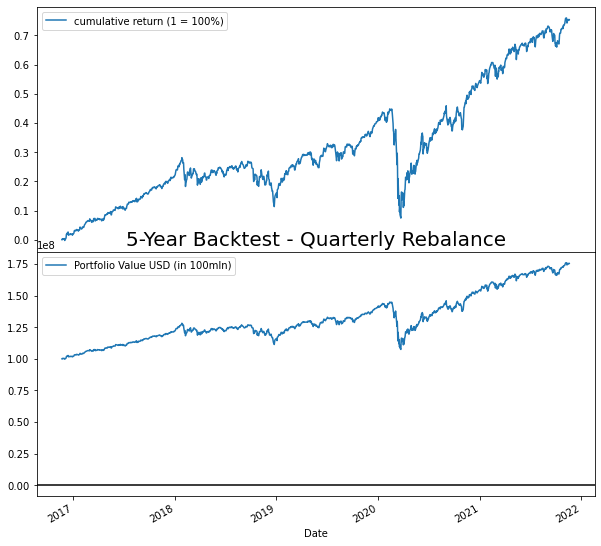

In [29]:
fig, axes = plt.subplots(2,1, figsize = (10,10))

portfolio_quarterly.plot(y = 'Cumulative Return', ax =axes[0], label = "cumulative return (1 = 100%)")
portfolio_quarterly.plot(y='Portfolio_Value', ax= axes[1], label = "Portfolio Value USD (in 100mln)")
plt.axhline(y=0.0, color='black', linestyle='-')
plt.legend(loc='best')


#The two plots' horizontal axes should align.
plt.subplots_adjust(hspace=.0)
plt.title("5-Year Backtest - Quarterly Rebalance", fontsize =20)
plt.show()

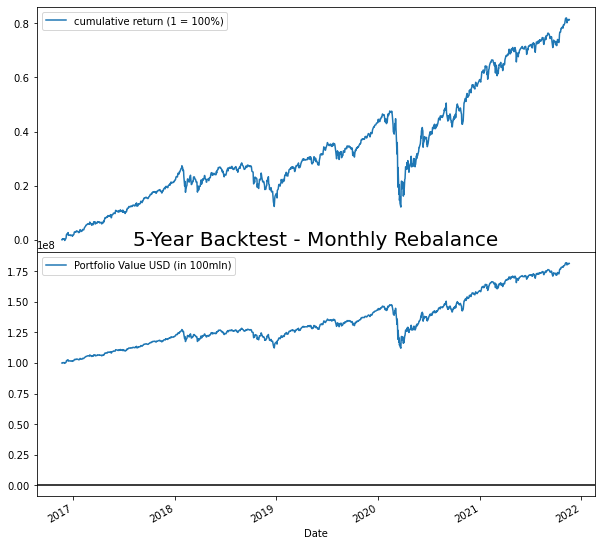

In [30]:
fig, axes = plt.subplots(2,1, figsize = (10,10))

portfolio_monthly.plot(y = 'Cumulative Return', ax =axes[0], label = "cumulative return (1 = 100%)")
portfolio_monthly.plot(y='Portfolio_Value', ax= axes[1], label = "Portfolio Value USD (in 100mln)")
plt.axhline(y=0.0, color='black', linestyle='-')
plt.legend(loc='best')


#The two plots' horizontal axes should align.
plt.subplots_adjust(hspace=.0)
plt.title("5-Year Backtest - Monthly Rebalance", fontsize =20)
plt.show()

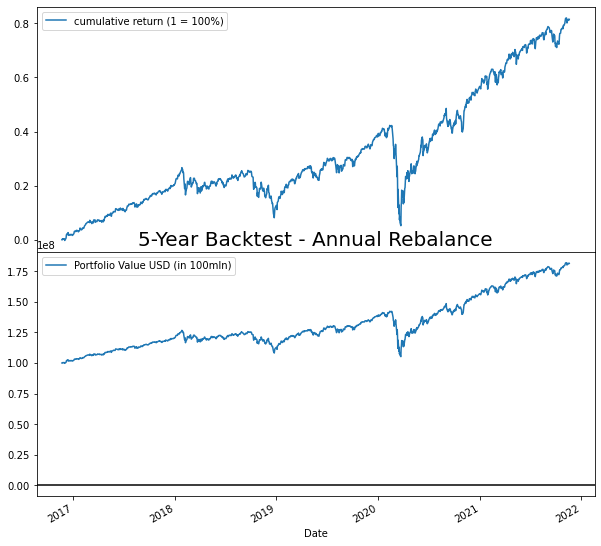

In [31]:
fig, axes = plt.subplots(2,1, figsize = (10,10))

portfolio_annual.plot(y = 'Cumulative Return', ax =axes[0], label = "cumulative return (1 = 100%)")
portfolio_annual.plot(y='Portfolio_Value', ax= axes[1], label = "Portfolio Value USD (in 100mln)")
plt.axhline(y=0.0, color='black', linestyle='-')
plt.legend(loc='best')


#The two plots' horizontal axes should align.
plt.subplots_adjust(hspace=.0)
plt.title("5-Year Backtest - Annual Rebalance", fontsize =20)
plt.show()

### Conclusion


In [32]:
print("Start Date: \n" , start_date)
print("End Date:\n " , end_date, "\n")
print("Monthly Rebalance: \n", "Cumulative Return: ", round(portfolio_monthly['Cumulative Return'][-1]*100,2), "Percent")
print("Quarterly Rebalance: \n", "Cumulative Return: ", round(portfolio_quarterly['Cumulative Return'][-1]*100,2), "Percent")
print("Semi-Annual Rebalance: \n", "Cumulative Return: ", round(portfolio_semi['Cumulative Return'][-1]*100,2), "Percent")
print("Annual Rebalance: \n", "Cumulative Return: ", round(portfolio_annual['Cumulative Return'][-1]*100,2), "Percent")

Start Date: 
 2016-11-21
End Date:
  2021-11-19 

Monthly Rebalance: 
 Cumulative Return:  81.43 Percent
Quarterly Rebalance: 
 Cumulative Return:  75.43 Percent
Semi-Annual Rebalance: 
 Cumulative Return:  77.5 Percent
Annual Rebalance: 
 Cumulative Return:  81.47 Percent


Based on 5-year return simulation, annual rebalance approach showed a higher cumulative return profile vs quarterly and semi-annual, annual rebalances. 